<div align="center">
      <h1>k-Nearest Neighbors: Hyperparameter Optimization</h1>
      <hr>
      <p>In this notebook, we will employ the k-nearest neighbors classifier that you've implemented to categorize the CIFAR-10 dataset. We will also introduce the concept of cross-validation for fine-tuning hyperparameters.</p>
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CIFAR-10 Dataset

The CIFAR-10 dataset comprises a set of small images primarily employed for classification tasks. This dataset is composed of 60,000 32x32 color images distributed across 10 distinct classes, with each class containing 6,000 images. There are 50,000 images designated for training and an additional 10,000 images for testing. The 10 classes and their respective labels are as follows:

<br>

<div align="center">

| Label | Description | Label | Description |
|:-----:|:-----------:|:-----:|:-----------:|
| 0     |    plane    | 5     |     dog     |
| 1     |     car     | 6     |     frog    |
| 2     |     bird    | 7     |    horse    |
| 3     |     cat     | 8     |     ship    |
| 4     |     deer    | 9     |    truck    |

</div>

<br>

We will proceed to download the dataset.

### Loading and Subsampling the CIFAR-10 Dataset
In the upcoming cell, we will load the CIFAR-10 dataset into memory. Subsequently, we will downsize the dataset to reduce its size, making it more manageable for the k-nearest neighbors (k-NN) algorithm to run efficiently. It's worth noting that the original dataset lacks a predefined validation set. To address this, we will create our own validation set later on. This validation set will prove essential for fine-tuning the hyperparameters of the classifier.

CIFAR-10 dataset already exists


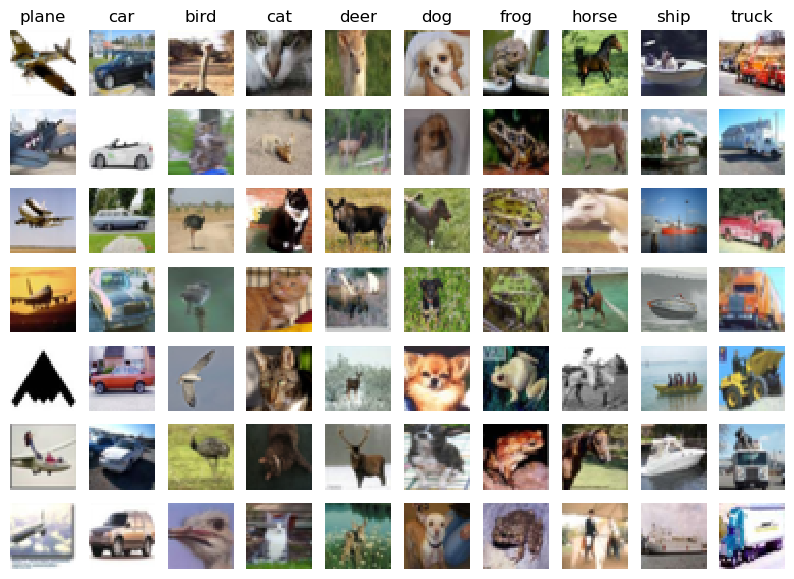

---------------- Training data ----------------
X_train shape: (8000, 32, 32, 3), y_train shape: (8000,)

---------------- Validation data ----------------
X_val shape: (1000, 32, 32, 3), y_val shape: (1000,)

---------------- Testing data ----------------
X_test shape: (1000, 32, 32, 3), y_test shape: (1000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 10000
Number of samples in training set: 8000, which is 80.00% of the dataset
Number of samples in validation set: 1000, which is 10.00% of the dataset
Number of samples in testing set: 1000, which is 10.00% of the dataset


In [14]:
from utils import load_cifar10_subset, reshape_to_vectors, normalize, dataset_stats

X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_subset(directory='./data/datasets/CIFAR10', 
                                                                     num_train=800, 
                                                                     num_val=100, 
                                                                     num_test=100,
                                                                     visualize_samples=True)


num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)
X_train, X_val, X_test = normalize(X_train, X_val, X_test)

### Data Reshaping

To prepare the image data for use with the k-nearest neighbors classifier, we must reshape it into a suitable format, where each image is represented as a row. To achieve this, please navigate to the `assignments/preprocessing.py` file and complete the implementation of the `reshape_to_vectors` function. Afterward, return to this notebook and execute the following cell to carry out the data reshaping process.

## Training the k-Nearest Neighbors Classifier

With our data loaded and preprocessed, we are now ready to train the k-nearest neighbors classifier that we previously constructed, using the CIFAR-10 dataset. The code for this task remains consistent with what we employed in the previous notebook. To initiate the training process, please execute the following cell.

In [15]:
from sklearn.metrics import accuracy_score
from assignments_solution import KNNClassifier

# Create and train the classifier
knn = KNNClassifier(k=5, vectorized=True)
knn.train(X_train, y_train)

# Predict the labels of the given samples
y_pred = knn.predict(X_test)

# Compute the accuracy of the predictions, you should expect to see an accuracy of around 0.28.
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.29


## Hyperparameter Tuning
You might be wondering how we arrived at the value of k=5. The answer is... it was a guess. In this section, we'll determine the optimal value for this hyperparameter through the process of cross-validation.

For this task, you will utilize the ChatGPT to gain a clear understanding of what cross-validation entails. Please follow this link to access the chatbot conversation: [ChatGPT Conversation on Cross-Validation](https://chat.openai.com/share/6b1b7a91-ce99-4d3d-9743-22557c37a80e ). Feel free to continue the conversation if you need further clarification.

Once you are confident in your understanding of cross-validation, proceed to the `assignments/tuning.py` file and implement the `cross_validate_knn` function. Afterward, return to this notebook and execute the following cell to identify the optimal value for k.

In [16]:
from assignments_solution import cross_validate_knn

num_folds = 5
k_choices = np.array([1, 3, 5, 8, 10, 12, 15, 20, 30], dtype=np.int32)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Find the best value of k using cross validation
k_to_metrics = cross_validate_knn(classifier=knn, X=X_train, y=y_train, k_choices=k_choices, num_folds=num_folds)

## What is the best value of k?

Now that we've completed the cross-validation, you might be expecting to determine the single best value for k, right? Well, not quite. The key takeaway from this assignment's second lesson is that there is typically no one-size-fits-all hyperparameter value. In a broader sense, as you delve into deep learning, you'll discover that there isn't a universally superior model, loss function, optimizer, or any other component. The approach that works best often depends on the specific task at hand. Remember this concept—it's crucial for project success. Be prepared to explore different models, functions, and hyperparameters, and **choose the ones that are most effective for your particular task**.

But how do we evaluate a model's performance for our task? The answer lies in metrics. From the KUI course, you should have some familiarity with metrics such as **accuracy**, **precision**, **recall**, and perhaps the **F1** score. If these concepts aren't fresh in your memory, consider looking them up for a quick refresher.

Now, let's proceed to identify the optimal value for k based on these metrics. Execute the cell below to visualize the results of our cross-validation.

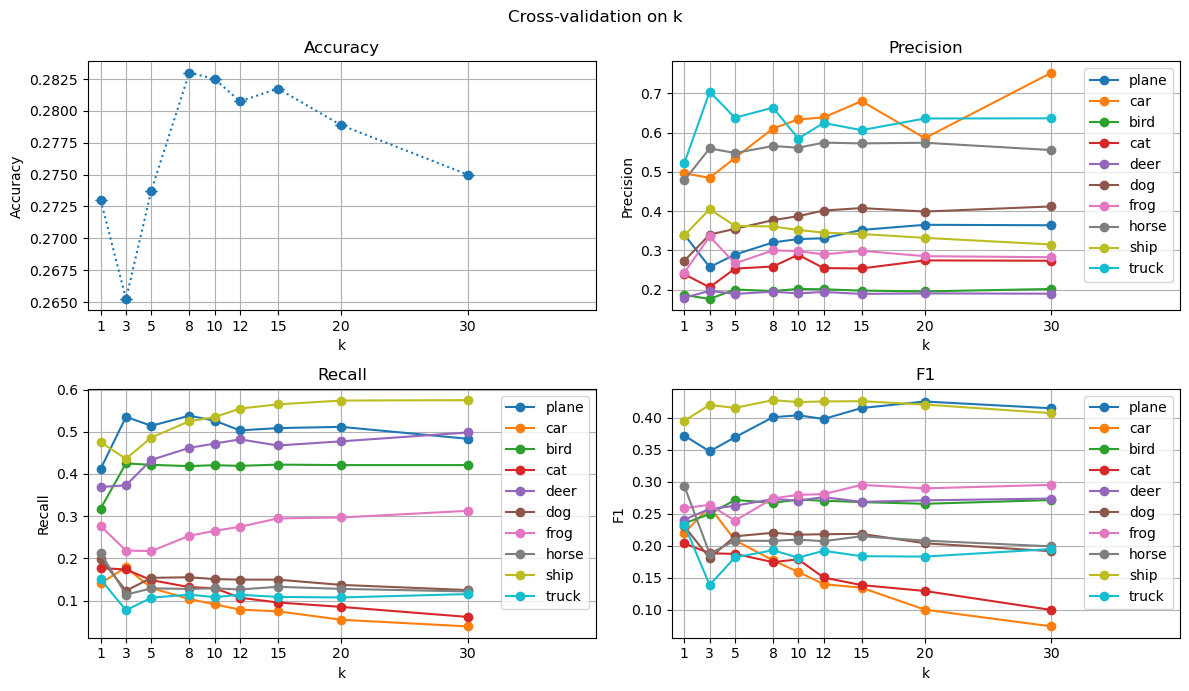

In [8]:
from utils import show_cross_validation_knn

# Plot the cross validation results
show_cross_validation_knn(k_to_metrics, classes)

## Classification Task
You are a data scientist, and you've been recruited by Company X (not Elon Musk's X, though 😄) to construct a classifier designed for object classification within images. You've had a discussion with the company to clarify their expectations regarding the classifier's performance.

#### Conversation

- *You:*  "What metrics would you like to use to assess the classifier?"

- *Company:*  "Metrics? What are those?"

- *You:*  "Metrics are numerical measures that help us gauge how well the classifier is performing. For instance, accuracy measures how many samples the classifier correctly identifies."

- *Company:*  "I understand now. We want the classifier to be as accurate as possible."

- *You:*  "Certainly, I'll strive for maximum accuracy. Anything else you'd like to add?"

- *Company:*  "Yes, we have a keen interest in the ship class. If there's a `ship` in an image, we want the classifier to detect it."

- *You:*  "I see. And if there's no ship in the image, but the classifier says there is?"

- *Company:*  "That's not a concern for us. Our primary goal is to ensure that the classifier doesn't miss any ships."

<div align="center">
      <hr>
</div>

### QUESTIONS:
1. Which metric is most suitable for assessing the classifier's performance, and what is the rationale behind this choice?
2. In the context of finding the optimal k value (if the metric isn't accuracy), which class should be considered, and why?
3. What value of k is deemed the most suitable for this specific task?

### ANSWERS:

...

<div align="center">
      <hr>
</div>